1.4.2

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

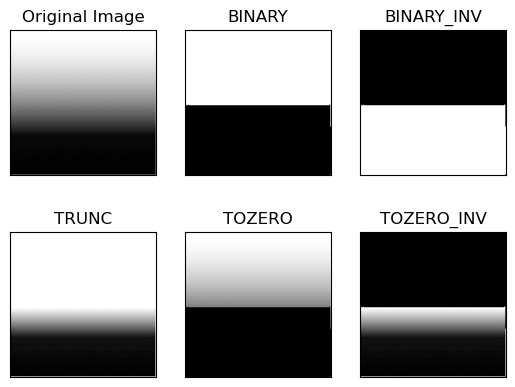

In [2]:
img = cv2.imread('gradient.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) # 127 threshold value, 255 픽셀 값이 threshold 값을 넘을 때 설정할 최대 값 127 이상인 픽셀은 255(흰색) 127미만인 픽셀은 0(검정색) 변환
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) #BINARY 반전 버전 위에랑 동일
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) #127 이상의 값은 모두 127로 고정되고 127미만의 값은 원본 그대로 유지
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) # 임계값을 넘는 픽셀은 원래 값을 유지하고 임계값보다 작은 값은 0으로 설정
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) #TOZERO 반전 버전 임계값을 넘는 픽셀은 0으로 설정 나머지는 원래 값을 유지
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
img = cv2.imread('sIMG_2168.jpg',0)
img = cv2.medianBlur(img,5)# 흐리게 처리를 함 커널 크기5
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #Global Thresholding을 사용함 th1은 전역 임계처리를 적용한 결과 이미지
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) #적응형 임계처리 11 영역의 크기, 2 게산된 평균값에서 뺄 값을 설정하여 더 세밀하게 조정 th2 적응형 평균 결과 이미지
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)#적응형 임계처리 주변 픽셀의 가우시안 가중치에 기반하여 임계값 계산


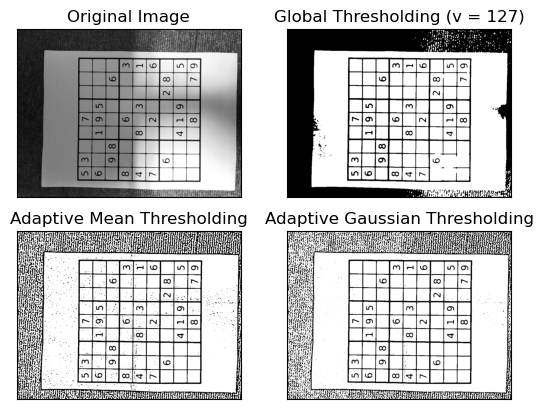

In [4]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
img = cv2.imread('sIMG_2168.jpg',0)
#img = cv2.medianBlur(img,5)

In [6]:
global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


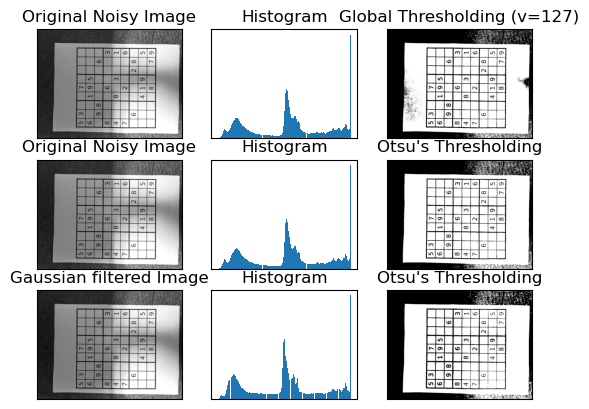

In [7]:
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()